<h1 align = 'center'> Learning To See </h1>

<h2 align = 'center'> Part 10: World Domination </h2>

## Import Data and Support Functions

In [1]:
%pylab inline
from supportFunctions import *
import cPickle as pickle
import time, itertools

pickleFileName = 'data/fingerDataSet' + '.pickle'
pickleFile = open(pickleFileName, 'rb')
data = pickle.load(pickleFile)
pickleFile.close()

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Return to just using 3 images at training data:
trainingExampleIndices = [7, 30, 46]
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = extractExamplesFromList(trainingExamples, whichImage = 'image1bit', dist = 4)

#And two for testing:
testingExampleIndices = [40, 41]
testingExamples = [data[index] for index in testingExampleIndices]
testX, testY = extractExamplesFromList(testingExamples, whichImage = 'image1bit', dist = 4)

## Search for 2 pixel patterns, by considering all possible rules made by combining 2 pixels.

In [3]:
rules = []
numErrors = []
startTime = time.time()

for i in range(81):
    for j in range(81):
        if i != j:
            #Not i and not j:
            yHat = np.logical_and(trainX[:,i] == 0, trainX[:,j]==0)
            numErrors.append(sum(abs(yHat-trainY)))
            rules.append([i, j, 0, 0])

            #i and not j:
            yHat = np.logical_and(trainX[:,i] == 1, trainX[:,j]==0)
            numErrors.append(sum(abs(yHat-trainY)))
            rules.append([i, j, 1, 0])

            #not i and j
            yHat = np.logical_and(trainX[:,i] == 0, trainX[:,j]==1)
            numErrors.append(sum(abs(yHat-trainY)))
            rules.append([i, j, 0, 1])

            #i and j
            yHat = np.logical_and(trainX[:,i] == 1, trainX[:,j]==1)
            numErrors.append(sum(abs(yHat-trainY)))
            rules.append([i, j, 1, 1])

timeElapsed = time.time()-startTime
print 'Time elapsed = ' + str(round(timeElapsed, 3)) + ' seconds.'

Time elapsed = 2.212 seconds.


In [4]:
np.argmin(np.array(numErrors))

478

In [5]:
len(rules)

25920

In [6]:
len(numErrors)

25920

In [7]:
rules[478]

[1, 40, 0, 1]

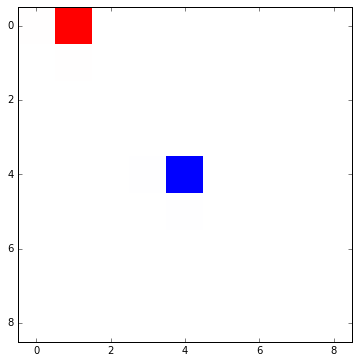

In [8]:
ruleVector = np.zeros(81)
ruleVector[1] = -1
ruleVector[40] = 1

fig = figure(0, (6,6))
imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = rwb)

Our first two pixel rule! Examples with ones in the blue spot and zeros in the red spot will be labeled as fingers

Confusion Matrix:
[[ 362  133]
 [ 345 7027]]
Recall (TPR) = 0.731 (Portion of fingers that we "caught")
Precision (PPV) = 0.512(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.939


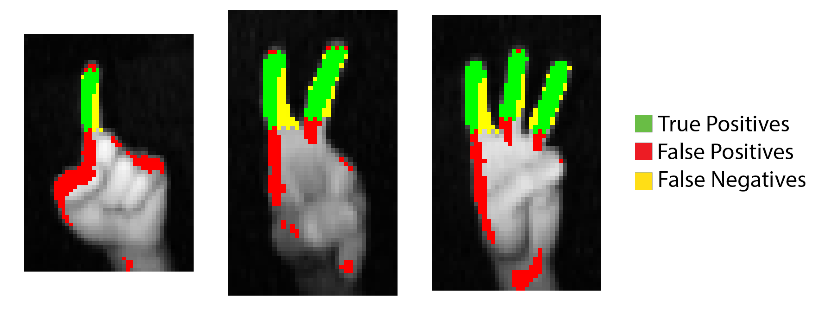

In [10]:
#Try our out rule on training Data:
rule = lambda X: np.logical_and(X[:, 1] == 0, X[:,40] == 1)

fig = figure(0, (14, 8))
testLogicalRules(trainingExampleIndices, data, fig, trainX, trainY, rule)

And testing data:

Confusion Matrix:
[[ 254   87]
 [ 237 4296]]
Recall (TPR) = 0.745 (Portion of fingers that we "caught")
Precision (PPV) = 0.517(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.934


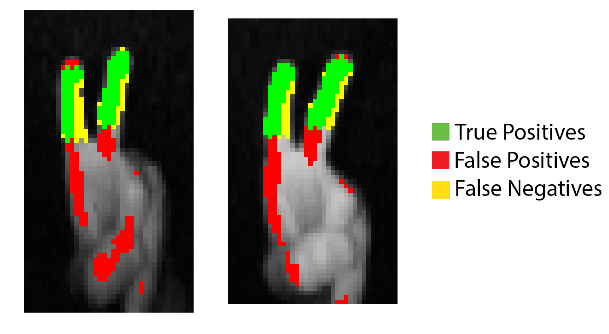

In [11]:
fig = figure(0, (14, 8))
testLogicalRules(testingExampleIndices, data, fig, testX, testY, rule)

Generalizes Well! Now 3 pixels:

In [12]:
import itertools

rules = []
numErrors = []
startTime = time.time()

for c in itertools.combinations(range(81), 3):
    i = c[0]; j = c[1]; k = c[2]

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 0, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 0, 1])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 1, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 1, 1])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 0, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 0, 1])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 1, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 1, 1])
    
timeElapsed = time.time()-startTime
print 'Time elapsed = ' + str(round(timeElapsed, 3)) + ' seconds.'

Time elapsed = 74.524 seconds.


In [11]:
np.argmin(np.array(numErrors))

218858

In [12]:
rules[218858]

[9, 40, 53, 0, 1, 0]

In [13]:
len(rules)

682560

In [13]:
rule = lambda X: np.logical_and(np.logical_and(X[:, 9] == 0, X[:,40] == 1), X[:, 53] == 0)

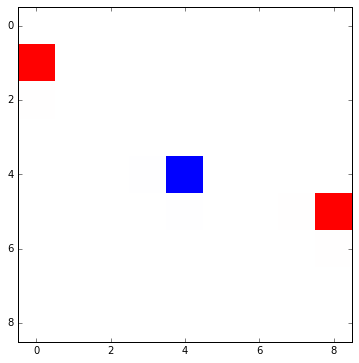

In [14]:
ruleVector = np.zeros(81)
ruleVector[9] = -1; ruleVector[40] = 1; ruleVector[53] = -1

fig = figure(0, (6,6))
imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = rwb)

Confusion Matrix:
[[ 327  168]
 [  73 7299]]
Recall (TPR) = 0.661 (Portion of fingers that we "caught")
Precision (PPV) = 0.818(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.969


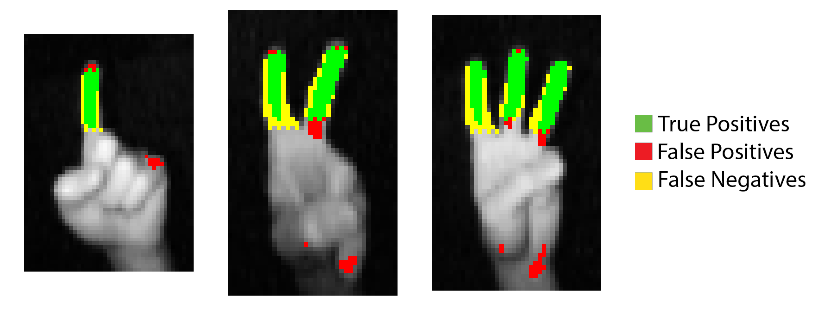

In [23]:
fig = figure(0, (14, 8))
testLogicalRules(trainingExampleIndices, data, fig, trainX, trainY, rule)

Confusion Matrix:
[[ 226  115]
 [ 102 4431]]
Recall (TPR) = 0.663 (Portion of fingers that we "caught")
Precision (PPV) = 0.689(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.955


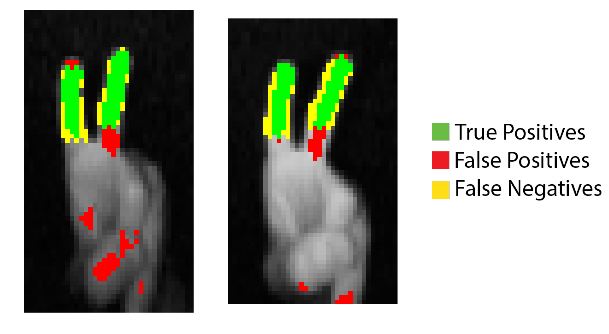

In [22]:
fig = figure(0, (14, 8))
testLogicalRules(testingExampleIndices, data, fig, testX, testY, rule)

## But why stop there? 4 pixels!

In [14]:
import operator as op
def ncr(n, r):
    r = min(r, n-r)
    if r == 0: return 1
    numer = reduce(op.mul, xrange(n, n-r, -1))
    denom = reduce(op.mul, xrange(1, r+1))
    return numer//denom

In [15]:
ncr(81,4)

1663740

In [ ]:
numCombinations = ncr(81, 4)
combinationCount = 0

rules = []
numErrors = []
startTime = time.time()

for c in itertools.combinations(range(81), 4):
    i = c[0]; j = c[1]; k = c[2]; l = c[3]
    
    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==0), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 0, 0, 0])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==1), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 0, 1, 0])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==0), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 1, 0, 0])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==1), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 1, 1, 0])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==0), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 0, 0, 0])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==1), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 0, 1, 0])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==0), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 1, 0, 0])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==1), trainX[:,l]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 1, 1, 0])
    
    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==0), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 0, 0, 1])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==1), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 0, 1, 1])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==0), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 1, 0, 1])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==1), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 0, 1, 1, 1])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==0), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 0, 0, 1])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==1), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 0, 1, 1])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==0), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 1, 0, 1])

    yHat = np.logical_and(np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==1), trainX[:,l]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, l, 1, 1, 1, 1])
    
    combinationCount +=1
    
    #Print update each 1 percent complete:
    if combinationCount%round((0.01*numCombinations))==0:
        percentDone = float(len(rules))/(2**4*numCombinations)*100
        timeElapsed = time.time()-startTime
        print str(round(percentDone, 0)) + '% done! Time elapsed = ' + str(round(timeElapsed, 3)) + ' seconds.'
        combinationCount = 0

1.0% done! Time elapsed = 36.25 seconds.


In [ ]:
np.argmin(np.array(numErrors))

If this code finished, you are more patient than I. 